# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
pwd

'C:\\Users\\farad\\Springboard-Career Track\\EDA Human Tempreture'

In [81]:
import pandas as pd

df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\EDA Human Tempreture\\human_body_temperature.csv')

## 1.a Is the distribution of body temperatures normal? 

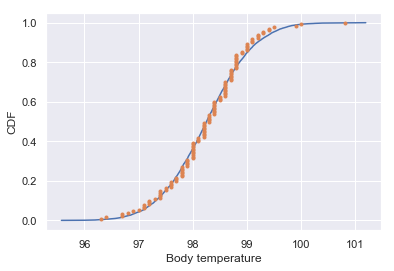

In [18]:
import numpy as np
mean_temp = np.mean(df['temperature'])
std_temp = np.std(df['temperature'])
samples_tmp = np.random.normal(mean_temp,std_temp,size=10000)
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x,y =ecdf(df['temperature'])
x_theor,y_theor = ecdf(samples_tmp)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.xlabel('Body temperature')
_ = plt.ylabel('CDF')

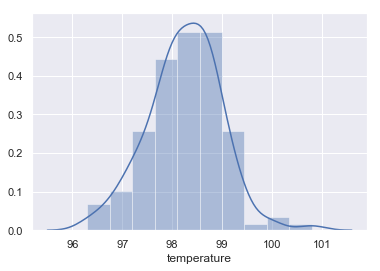

In [93]:
sns.distplot(df['temperature'],bins=10,norm_hist=False)
plt.show()

## 2. Is the sample size large? Are the observations independent?
The total sample size is 130. if the sample size is bigger than 30, we say that it tends to normal distribution. we call the observation independent if we take them with replacement or if they are less than 10% of population. which looks like it is 10% of observations as well.

## 3. Is the true population mean really 98.6 degrees F?
### a) First, try a bootstrap hypothesis test. 

In [37]:
import numpy as np
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates
transfered_temp = df['temperature'] - np.mean(df['temperature']) + 98.6
bs_replicates = draw_bs_reps(transfered_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(transfered_temp)) / 10000
print('p = ', p)

p =  0.493


### b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
it's one sample test, becuase we want to test if the true population mean is equal to 98.6 or not.

### c. In this situation, is it appropriate to use the t or z statistic? 
t statistic, because we have sample mean and sample standard deviation. we don't know the real mean and standard deviation. so we use t test for hypothesis testing.however, since the sample size is bigger than 30, it tends to z test.

In [49]:
from scipy import stats
ttest,pval = stats.ttest_1samp(df['temperature'], 98.6)
print(ttest, float(pval))
if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# since p-value is very small, we reject H0 that population mean is equal to 98.6

-5.4548232923645195 2.4106320415561276e-07
reject null hypothesis


### d. Now try using the other test. How is the result be different? Why?

In [50]:
 import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['temperature'], x2=None, value=98.6)
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

# in both cases, we reject null hypothesis. but the p value in z test, is twice smaller than t test. in z test, it reject the test with higher certainty.
# however, z value and t value is equal, because we use same formula in both of them. 
# this almost same results is because of normal distribution of sample.

-5.4548232923645195 4.9021570141012155e-08
reject null hypothesis


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [75]:
import numpy as np
sample_temp = np.random.choice(df['temperature'], size=10, replace=False)
# t test
from scipy import stats
ttest,pval = stats.ttest_1samp(df['temperature'], 98.6)
print(ttest, float(pval))
if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# z test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['temperature'], x2=None, value=98.6)
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-5.4548232923645195 2.4106320415561276e-07
reject null hypothesis
-5.4548232923645195 4.9021570141012155e-08
reject null hypothesis


What do you notice? What does this tell you about the difference in application of the t and z statistic? 
z test and t test results didn't change. p values didn't change either. that shows that z test and t test are robust method. which even with small sample sized, we get the same sample sizes. this similarity and robustness is because of the distribution of the sample. having nomral sample can help to increase the effectiveness of specificly z test. 

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [89]:
# 95% confidence interval
import numpy as np
conf_int_95 = np.percentile(df['temperature'],[2.5,97.5])
# 99% confidence interval
conf_int_99 = np.percentile(df['temperature'],[0.5,99.5])
print('95% confidence interval is ', conf_int_95)
print('99% confidence interval is ', conf_int_99)

95% confidence interval is  [96.7225 99.4775]
99% confidence interval is  [ 96.3645 100.284 ]


## 6. Is there a significant difference between males and females in normal temperature?

In [78]:
male_temp = df[df.gender == 'M']['temperature']
female_temp = df[df.gender == 'F']['temperature']
import scipy
ttest, pval = scipy.stats.ttest_ind(male_temp,female_temp, equal_var=False)
print(ttest, float(pval))
if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-2.285434538165611 0.023938264182934196
reject null hypothesis


I used t test, because we have the sample mean and sample standard deviation. but for z test, we need to have population mean and standard deviation. however, for samples larger than 30, we can use each one of them and produce the same results.